SGD for Linear Regression on Boston House Price dataset
Number of Instances: 506 

Number of Attributes: 13 numeric/categorical predictive

Median Value (attribute 14) is usually the target

Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's


In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
# We will load boston house price datasets
from sklearn.datasets import load_boston
boston=load_boston()

In [5]:
print(boston.data.shape)

(506, 13)


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
#converting into pandas
bos=pd.DataFrame(data=boston.data)

In [10]:
bos.shape

(506, 13)

In [11]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [13]:
# spliting the data into train and test
price=boston.target
X_train, X_test, Y_train, Y_test = train_test_split(bos, price, test_size=0.33, random_state=5)

In [14]:
# applying column standardization on train and test data
s=StandardScaler()
X_train=s.fit_transform(np.array(X_train))
X_test=s.transform(np.array(X_test))

In [15]:
#training data for manual SGD regressor
manual_train=pd.DataFrame(data=X_train)
manual_train['price']=Y_train

In [16]:
manual_train.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,27.5
3,-0.406208,0.839388,-0.901940,-0.256978,-1.083710,0.097426,-0.515087,1.600509,-0.411970,-0.624310,-0.860301,0.152292,-0.184576,22.2


In [17]:
# lets convert to numpy array, which will be available for both SGDRegressor of sklearn and manual SGD regressor
X_test = np.array(X_test)
Y_test=np.array(Y_test)

In [18]:
results=pd.DataFrame(columns=['sno', 'algo', 'alpha', 'lr_rate_variation', 'init_lr_rate', 'power_t', 'n_iter', 'error'])

SGDregressor v/s manual SGD :
fixing initial learning rate = 0.01, and making it constant and changing number of iteration

In [21]:
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#the functioning of this function is to use SGDRegressor of sklearn and predict the price

#this function takes alpha, learning rate variation , initial learning rate(eta0), number of iteration , power_t, 
#and all test and train data as an argument

#this function returns weight, intercept and mean squared error
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=100, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
    #scatter plot
    plt.scatter(Y_test,y_pred)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('***********************************************************')
    
    
       
    sgd_error=mean_squared_error(Y_test,y_pred)
    print('Mean Square Error(MSE)=', sgd_error)
    print('Number of iteration=', n_iter)
    
    return clf.coef_, clf.intercept_, sgd_error

SGDRegressor, n_iter=1, lr_rate=0.01, lr_rate_variation='constant'

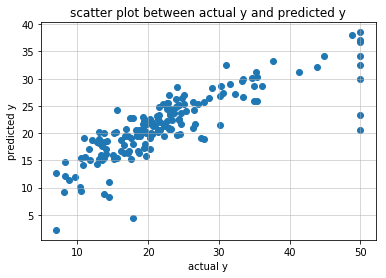

***********************************************************
Mean Square Error(MSE)= 33.82391592894167
Number of iteration= 1


In [26]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1)

In [27]:
new=[1, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 1, error_sgd]
results.loc[0]=new

Manual sgd, n_iter=1, lr_rate=0.01, lr_rate_variation='constant'

In [28]:
# this function of sgd to linear regression, and we didn't use any regularization
# we need to provide the pandas data with price, initial learning rate , and learning rate variation, number of iteration
# here we have implemented constant learning rate and invscaling learning rate
# checking the significant difference in loss i.e stopping condition might take lots of time so here we fix the number of loop 
# this function returns weight (w) and bias (b)
# here we have taken sgd with batch size=10
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return w_new, b_new



def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(X_test,y_pred):
    #scatter plot
    plt.scatter(Y_test,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()
    print('**************************************************************')
    
    
       
    manual_error=mean_squared_error(Y_test,y_pred)
    print('error=',manual_error)
    
    return manual_error

In [29]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1)

In [30]:
y_pred=pred(X_test, w=w, b=b)

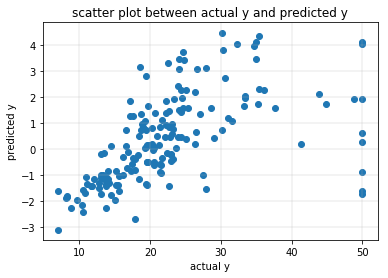

**************************************************************
error= 568.7209772882031


In [31]:
manual_error=plot_(X_test,y_pred)

In [32]:
new=[2, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 1, manual_error]
results.loc[1]=new

In [33]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.35702048  0.08266086 -0.10239431  0.44093634 -0.10910239  2.46655515
 -0.34848948 -1.92032904  0.5283692  -0.73835999 -1.81926016  0.67172549
 -2.59121611]
*********************************************************************************
manual sgd weight---
 [[-0.07012448  0.39323983 -0.16449092 -0.11851829 -0.19470416  0.40401932
  -0.20265916  0.30616198 -0.0913902  -0.09932136 -0.06671894  0.09365488
  -0.11135006]]


In [35]:
b_diff=[]
w_num=[]

In [36]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 13


In [37]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [21.85457053]
manual sgd intercept= [0.4612]


SGDRegressor, n_iter=100, lr_rate=0.01, lr_rate_variation='constant'

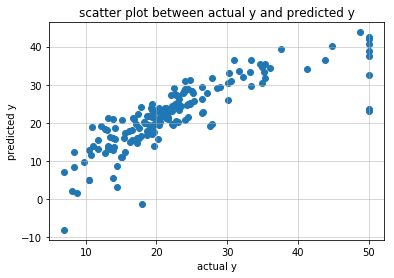

***********************************************************
Mean Square Error(MSE)= 29.298643950968767
Number of iteration= 100


In [38]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=100)

In [39]:
new=[3, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 100, error_sgd]
results.loc[2]=new

manual sgd, n_iter=100, lr_rate=0.01, lr_rate_variation='constant'

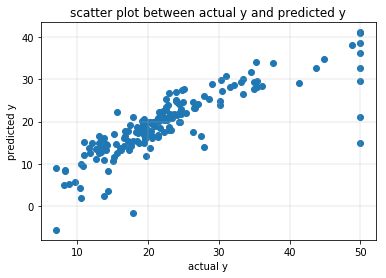

**************************************************************
error= 38.174674648802366


In [40]:
w, b = manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=100)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)

In [41]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.35709272  0.85262411 -0.03906446 -0.12357815 -1.38949533  3.15918935
 -0.11278818 -2.83285993  3.01781162 -2.18381783 -2.18728517  1.2063615
 -3.72778715]
*********************************************************************************
manual sgd weight---
 [[-0.7271526   0.42339693 -0.12005175  0.9564923  -0.56772734  3.59332289
  -0.10954926 -1.30272929  0.15610412 -0.56580697 -1.55558616  0.47313158
  -2.6701413 ]]


In [42]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 11


In [43]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [22.81739743]
manual sgd intercept= [19.7352474]


In [44]:
new=[4, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 100, manual_error]
results.loc[3]=new

SGDRegressor, n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'

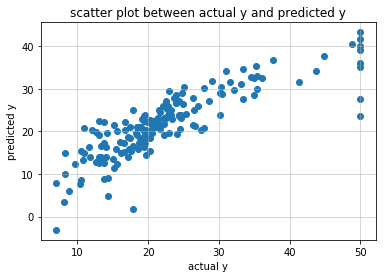

***********************************************************
Mean Square Error(MSE)= 26.91099337372429
Number of iteration= 1000


In [45]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1000)

In [46]:
new=[5, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 1000, error_sgd]
results.loc[4]=new

manual sgd, n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'

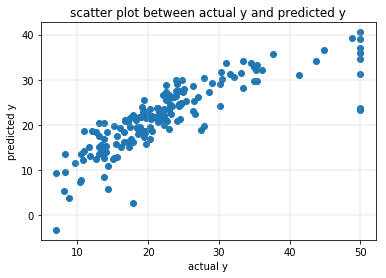

**************************************************************
error= 28.977005451071797


In [49]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1000)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)

In [50]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-0.91245506  0.84580875 -0.07287302  0.84191006 -1.28625449  2.891746
 -0.24800855 -2.81948556  3.31459101 -1.99498119 -1.85775569  1.32966677
 -3.15006517]
*********************************************************************************
manual sgd weight---
 [[-1.13834913  0.73851781 -0.66076759  0.20044495 -1.60891443  2.27211922
  -0.2743936  -2.81237744  2.29928115 -1.27759899 -1.96177298  1.09897454
  -3.08302218]]


In [51]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 4


In [52]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [22.54362213]
manual sgd intercept= [22.48048925]


In [53]:
new=[6, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 1000, manual_error]
results.loc[5]=new

SGDRegressor, n_iter=10000, lr_rate=0.01, lr_rate_variation='constant'

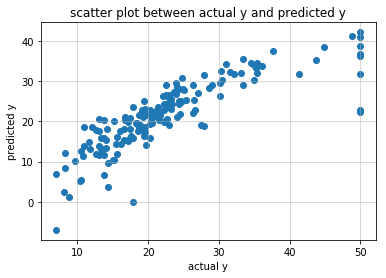

***********************************************************
Mean Square Error(MSE)= 29.561952523426328
Number of iteration= 10000


In [54]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=10000)

In [55]:
new=[7, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 10000, error_sgd]
results.loc[6]=new

manual sgd, n_iter=10000, lr_rate=0.01, lr_rate_variation='constant'

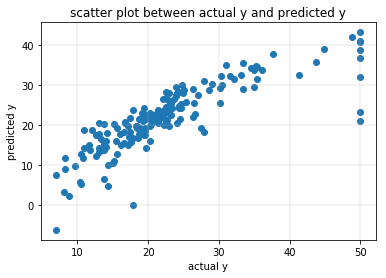

**************************************************************
error= 28.265946398298816


In [57]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=10000)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)

In [58]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.39033976  0.90260603 -0.12090788  0.06214326 -1.616322    3.00791639
 -0.33208097 -2.61225227  3.242564   -2.22245299 -1.91932414  1.18716643
 -3.23288165]
*********************************************************************************
manual sgd weight---
 [[-1.26883199  0.73832373  0.10828917  0.30346918 -1.3426479   3.25671452
  -0.4613516  -2.60809225  2.78571548 -2.3704637  -1.99195702  1.05739555
  -2.99330407]]


In [59]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 2


In [60]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [22.35774919]
manual sgd intercept= [22.59159576]


In [61]:
new=[8, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 10000, manual_error]
results.loc[7]=new

In [63]:
import tabulate
table1 = [['n_iter', 'no. of points>30% in w', 'difference in intercept'],
         [1,w_num[0], b_diff[0]], 
         [100, w_num[1], b_diff[1]],
         [1000, w_num[2], b_diff[2]],
         [10000, w_num[3], b_diff[3]]]

In [64]:
print(tabulate.tabulate(table1, tablefmt='fancy_grid'))

╒════════╤════════════════════════╤═════════════════════════╕
│ n_iter │ no. of points>30% in w │ difference in intercept │
├────────┼────────────────────────┼─────────────────────────┤
│ 1      │ 13                     │ [21.39337053]           │
├────────┼────────────────────────┼─────────────────────────┤
│ 100    │ 11                     │ [3.08215003]            │
├────────┼────────────────────────┼─────────────────────────┤
│ 1000   │ 4                      │ [0.06313288]            │
├────────┼────────────────────────┼─────────────────────────┤
│ 10000  │ 2                      │ [0.23384657]            │
╘════════╧════════════════════════╧═════════════════════════╛


In [65]:
results

,sno,algo,alpha,lr_rate_variation,init_lr_rate,power_t,n_iter,error
0,1,SGDRegressor,0.0001,constant,0.01,0.25,1,33.823916
1,2,manual sgd,0.0001,constant,0.01,0.25,1,568.720977
2,3,SGDRegressor,0.0001,constant,0.01,0.25,100,29.298644
3,4,manual sgd,0.0001,constant,0.01,0.25,100,38.174675
4,5,SGDRegressor,0.0001,constant,0.01,0.25,1000,26.910993
5,6,manual sgd,0.0001,constant,0.01,0.25,1000,28.977005
6,7,SGDRegressor,0.0001,constant,0.01,0.25,10000,29.561953
7,8,manual sgd,0.0001,constant,0.01,0.25,10000,28.265946


Observaytion:
By increasing iterations, error going to reduce for manual sgd and also weight going to get similar for sgd regressor and manul sgd. 